![title](Desktop/스크린샷%202020-10-01%20오후%2011.06.17.png)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

import matplotlib
matplotlib.rc("font", family = "AppleGothic")
matplotlib.rc("axes", unicode_minus = False)

from IPython.display import set_matplotlib_formats, Image
set_matplotlib_formats("retina")

In [2]:
!conda install -c conda-forge -y lightgbm

Solving environment: done

# All requested packages already installed.



In [3]:
train = pd.read_csv("Desktop/phthon/Kaggle/otto group product/train.csv",  index_col = "id")

print(train.shape)
train.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
test = pd.read_csv("Desktop/phthon/Kaggle/otto group product/test.csv",  index_col = "id")

print(test.shape)
test.head()

(144368, 93)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,0,0,0,2,0,4,0,4,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,1,0,4,0,2,3,0,0,0,0,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


![title](Desktop/스크린샷%202020-10-01%20오후%2011.07.31.png)

# explortory

In [5]:
# train 확인결과 이는 feature_name을 선별적으로 선택하는 것이 아니라 전체를 종합적으로 사용한 뒤 modeling해야하는 문제이다
# 따라 데이터분석본다는 정확한 예측모형을 만드는게 더 중요하다고 볼수 있음

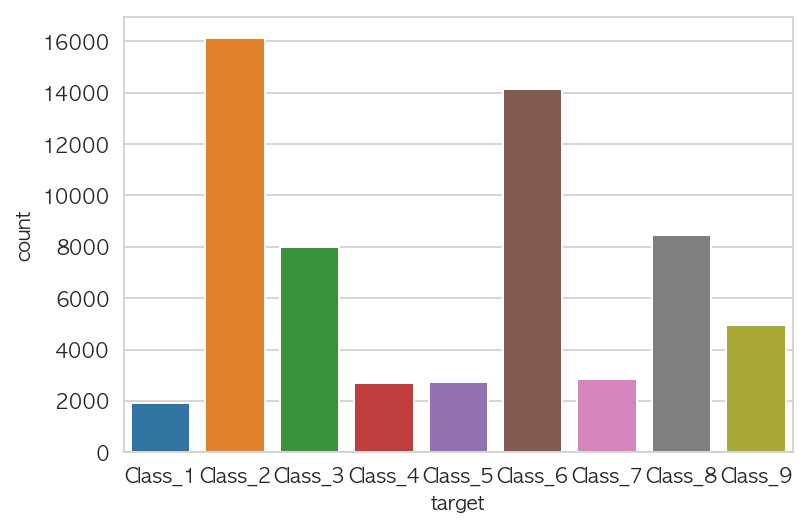

In [6]:
# 절대적인 수치는 class_2가 제일 많고 그다음 class_6이 많다 
# 가장 많은 데이터가 무엇인지 파악하는 차원에서 보는 것이고 이것이 label_name을 결정하는데 큰 영향을 주지는 않는다

sns.countplot(x = "target", data = train)

In [7]:
# 가장 수가 많은 class_2를 일부 뽑아서 어떤 feat이 가장 많은지 확인해본다
# 결과 밑처럼 feat_14 / feat_40 / feat_15 순으로 숫자가 많은 것을 알 수 있다

# 하지만 여기서는 이런식으로 독립적인 분석을 진행하면 안된다
# feat_14가 합산을 했을 때 가장 큰 숫자이긴 하지만, 이외에 feat_9의 경우 일정 큰 수가 있는 경우 이것도 class_2의 결과로 이어지는 모습을 보여준다
# 이는 일정수의 feat별로 연관성을 가져 독립성이 아닌, 연속성을 띈 데이터라고 봐야한다 

# 아마 0,1,2,3,4,5와 같은 single product를 어느쪽에서는 feat1로 , 어느쪽은 feat2로 보았다는 이야기이고 
# 따라서 이러한 상관관계를 연결할 수 있는 모델을 찾아야함을 보여준다 

train_feat_2 = train[train["target"] == "Class_2"]
train_feat_2 = train_feat_2.drop("target", axis = 1)
train_feat_2 = train_feat_2.T
train_feat_2["Total"] = train_feat_2.sum(axis = 1)
train_feat_2

train_feat_2.groupby(train_feat_2.index)["Total"].sum().reset_index().\
sort_values(by = "Total", ascending = False).head()

,index,Total
5,feat_14,56700
34,feat_40,53593
6,feat_15,45394
17,feat_25,44706
42,feat_48,36336


In [8]:
# 각 feat별로 상관관계를 파악하여 어느정도 연관성이 있는지 추측해본다. 
# 여기서 알 수 있는 사실은 feature_name을 진행할 때 전 feat를 사용해야 한다는 것이다 
# 각 feat가 어느정도 연관성을 가지고 서로에게 영향을 주며 움직이고 있음을 알 수 있고 확고하게 영향을 미치는 것은 적다는 점을 알 수 있기에 
# 이 문제가 log_loss를 통해 문제를 풀어야하는 이유를 설명해줄수 있다고 본다

# 주목할 점은 feat_4와 feat_19
# 보통 correspond는 -1~1사이의 값을 나타내는데 이들은 각기 다른 feat와의 상관관계가 거의 다 이를 넘어선다
# 이 이야기는 이 두가지 feat는 다른 feat에 영향을 주거나 받지 않고 독자적으로 움직일 가능성이 높다는 이야기가 된다
# 아마 이 둘은 독자적으로 class를 찾아갈 가능성이 있다
# feature_name 구할때는 필요한 정보가 될 수 있음으로(독립성이 있어서 확실한 class를 보장할 가능성이 크다) 그대로 담는다

train_correlation = train.corr()
train_correlation

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_1,1.000000,0.031332,-0.027807,-2.752941e-02,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,-0.042928,0.056934,0.139254,0.063517,-0.045738,0.027086,0.053004,0.084856,2.302499e-03,0.070511,-0.027026,0.063283,0.048686,0.067255,0.187237,-0.022813,-0.038826,-0.030257,0.069266,0.033108,-0.011210,0.061361,0.049454,-0.042756,-0.010667,0.095475,0.082306,0.104666,0.006898,0.053603,0.080960,0.073611,0.008884,0.090439,0.008601,-0.040647,0.026463,0.130564,0.011179,0.040114,0.000902,-0.013082,0.156400,0.001399,0.165044,0.015738,-0.014598,0.028696,0.139364,-0.020267,-0.038124,0.091636,0.069799,-0.010499,0.110041,0.053010,0.154301,0.014674,0.007544,0.165442,0.013712,-0.029983,0.140815,0.051365,0.011596,0.153808,0.123752,0.279202,0.228912,-0.013303,0.032427,-0.026085,0.059165,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.031332,1.000000,0.082573,1.349870e-01,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,0.118534,0.090153,0.157467,-0.070057,-0.048798,0.108046,0.074902,0.242716,1.766549e-01,0.449160,0.014113,0.215106,0.162065,0.253684,-0.096366,0.064856,0.037841,0.072494,0.025689,0.026896,0.193216,0.087699,-0.033927,-0.026717,0.293374,0.026988,0.124475,0.373022,0.020626,-0.057890,0.072120,0.043863,0.017600,0.208450,0.018259,0.042491,0.014574,0.023310,0.311278,0.071664,0.085345,0.105528,-0.008015,0.179173,0.134617,0.018908,0.104263,0.371146,-0.013283,0.018219,0.063873,0.029040,0.037020,-0.005354,0.078801,0.175620,0.068667,-0.012802,0.307406,0.112968,-0.002336,-0.023267,0.039192,0.070724,0.093689,0.259360,0.014911,0.094256,0.033668,0.155768,0.052101,0.119109,0.371691,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,-0.027807,0.082573,1.000000,5.835232e-01,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,0.596243,0.050037,0.013870,-0.111105,-0.065285,0.221426,-0.023093,0.115655,-1.222845e-02,-0.011069,0.354925,0.251082,-0.002427,-0.031596,-0.157459,0.268112,0.508370,0.551398,-0.004141,-0.007667,0.138548,-0.053753,-0.078520,-0.039765,0.233923,-0.034305,-0.029425,0.046097,-0.016279,-0.094511,-0.028920,0.036605,-0.014068,0.242901,-0.007984,0.777517,-0.009560,-0.111987,0.242692,-0.016765,0.031979,0.169111,-0.024222,0.694048,0.055445,0.016288,0.018887,0.034506,-0.021717,0.011369,0.494881,0.010733,0.031241,-0.065105,0.065492,0.088017,-0.110081,-0.030992,-0.032748,-0.018774,-0.053020,-0.045339,-0.013972,0.041559,-0.044724,-0.028670,-0.001584,-0.021979,-0.020566,0.442036,0.013089,0.438458,-0.019914,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,-0.027529,0.134987,0.583523,1.000000e+00,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,0.389409,0.057434,0.028973,-0.099215,-0.051222,0.211078,-0.007554,0.214895,-3.519107e-07,0.044657,0.232923,0.247738,0.030622,0.003728,-0.134231,0.365757,0.308629,0.486417,0.014271,-0.000873,0.351263,-0.036730,-0.054819,-0.029087,0.554474,-0.029660,-0.010646,0.092488,-0.002700,-0.076805,-0.009977,0.071397,-0.000893,0.238665,-0.002809,0.436274,-0.012914,-0.085788,0.300011,0.005343,0.041647,0.209517,-0.016308,0.525456,0.070077,0.019618,0.069462,0.039103,-0.015802,0.068900,0.354402,0.025228,0.059903,-0.047288,0.0622

In [9]:
train_correlation[["feat_4"]].sort_values(by = "feat_4", ascending = False).head()#.value_counts()

,feat_4
feat_4,1.000000
feat_3,0.583523
feat_35,0.554474
feat_54,0.525456
feat_28,0.486417


# preparation

### Select  [feature_names, label_name]

In [10]:
# label_name을 제외한 전부의 컬럼을 feature_name화 한다

label_name = "target"
feature_names = train.columns.difference([label_name])

x_train = train[feature_names]
y_train = train[label_name]
x_test = test[feature_names]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(61878, 93)
(61878,)
(144368, 93)


## coefficient of correlation

In [11]:
# 적용 전 hyperparameter에서 어떠한 상관관계가 있는지 분석해본다 
# tree를 어느정도 쳐야하는지, 숫자는 대략적으로 얼마나 되는지 확인하여 후에 적용할 수 있도록 한다 

In [12]:
# holdout validation을 활용하여 데이터를 분산해서 확인한다 

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

x_train_holdout, x_test_holdout, y_train_holdout, y_test_holdout = \
train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

print(x_train_holdout.shape)
print(x_test_holdout.shape)
print(y_train_holdout.shape)
print(y_test_holdout.shape)

(43314, 93)
(18564, 93)
(43314,)
(18564,)


In [13]:
# DecisionTreeClassifier로 대략적으로 조사를 했을때 70%정도의 정확성을 보여준다 

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train_holdout, y_train_holdout)

y_train_predict = model.predict(x_train_holdout)
y_test_predict = model.predict(x_test_holdout)

train_accuracy = (y_train_predict == y_train_holdout).mean()
test_accuracy = (y_test_predict == y_test_holdout).mean()

train_accuracy, test_accuracy

(1.0, 0.7098685628097393)

In [14]:
# max_depth을 조사했을때 대부분의 model과 마찬가지로 max_depth가 일정수가 증가할때 score가 좋아진다 
# 이를 통해 후에 적용시 max_depth이 어느정도의 크기가 되어있어야 한다는 것을 알 수 있다

max_depth_list = range(30,51)
hyperparameter = []

for max_depth in max_depth_list:
   
    model = DecisionTreeClassifier(random_state = 42, max_depth = max_depth)
    model.fit(x_train_holdout, y_train_holdout)

    y_train_predict = model.predict(x_train_holdout)
    y_test_predict = model.predict(x_test_holdout)

    train_accuracy = (y_train_predict == y_train_holdout).mean()
    test_accuracy = (y_test_predict == y_test_holdout).mean()
    
    print(f"max_depth = {max_depth}, train = {train_accuracy :.6f}, test = {test_accuracy:.6f}") 
    # hyperparameter.append({"max_depth" : max_depth, "train" : train_accuracy, "test" :test_accuracy})

max_depth = 30, train = 0.937434, test = 0.719242
max_depth = 31, train = 0.945630, test = 0.720103
max_depth = 32, train = 0.952209, test = 0.716009
max_depth = 33, train = 0.958674, test = 0.716710
max_depth = 34, train = 0.964469, test = 0.716494
max_depth = 35, train = 0.969386, test = 0.716063
max_depth = 36, train = 0.973126, test = 0.715255
max_depth = 37, train = 0.976867, test = 0.716602
max_depth = 38, train = 0.979360, test = 0.714340
max_depth = 39, train = 0.981530, test = 0.717787
max_depth = 40, train = 0.984070, test = 0.714609
max_depth = 41, train = 0.985709, test = 0.710946
max_depth = 42, train = 0.987856, test = 0.712993
max_depth = 43, train = 0.989311, test = 0.713370
max_depth = 44, train = 0.991365, test = 0.712724
max_depth = 45, train = 0.992589, test = 0.712185
max_depth = 46, train = 0.993905, test = 0.713855
max_depth = 47, train = 0.995152, test = 0.708037
max_depth = 48, train = 0.995683, test = 0.712400
max_depth = 49, train = 0.996652, test = 0.709114


### model_selection

In [15]:
# model을 적합성을 평가하기 위해 log_loss를 적용해야 한다.(문제의 조건임)
# log_loss의 최적조건을 맞출 수 있는 model을 선정해야함으로 이를 구하기 위해 
# LGBMClassifier / RandomForestClassifer 두가지를 hold-out으로 비교하여 점수가 더 좋은 모델을 선정하는 작업을 진행한다 

In [16]:
from lightgbm import LGBMClassifier
model_first = LGBMClassifier(boosting_type='gbdt')
model_first

/Users/dddddddd/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_second = RandomForestClassifier()
model_second

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
# LGBMClassifier로 log_loss 측정시 prediction은 0.51로 측정되고
# RandomForestClassifier로 log_loss 측정시 prediction은 1.49~ 1.51로 측정이 된다
# log_loss는 0 ~ 1 사이의 값을 주로 나타내고 이 범위를 벗어나면 무한대로 측정, 즉 오차가 심한결과를 가져오는데 
# RandomForestClassifier의 값이 많이 어긋난다는 것을 보여준다.
# 즉 이 문제에서는 Gradient Boosting을 통해 bias를 조절하는 작업을 진행해야 함을 보여준다 


# LGBMClassifier로 log_loss 측정
model_first.fit(x_train_holdout, y_train_holdout)
y_test_predict = model_first.predict_proba(x_test_holdout)

prediction_LGBM = log_loss(y_test_holdout, y_test_predict)


# RandomForestClassifier로 log_loss 측정
model_second.fit(x_train_holdout, y_train_holdout)
y_test_predict = model_second.predict_proba(x_test_holdout)

prediction_Random = log_loss(y_test_holdout, y_test_predict)



# 최종결과
print("LGBMClassifier is :", prediction_LGBM)
print("RandomForest is :", prediction_Random)

/Users/dddddddd/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LGBMClassifier is : 0.5106862326196198
RandomForest is : 1.513157589334495


### model optimization process

In [19]:
# Gradient Boosting안에 있는 hyperparameters들을 조절하는 작업을 진행한다 
# boosting_type을 dart, gbdt 둘중 한개를 선택해야 하는데 
# 보통은 dart가 더 좋다고 하나 여기서는 gbdt의 점수가 더 높다(default가정)
# 따라서 gbdt로 진행한다

from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type = "gbdt")
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
# hyperparameters 중 중요한 몇개들을 별도 세팅을 진행해준다 
# n_estimators / learning_rate가 제일 중요한 것이니 별도 세팅 진행해주고
# 구역을 나누어주는 max_bin, 가지수 결정하는 num_leaves
# random하게 서치하는데 필요한 colsample_bytree, subsample, subsample_freq, min_child_samples 정리한다

# 대략 몇개의 숫자를 넣고 돌려본다 맞는지 확인체크

random_search = 10

for number in range(random_search):
    
    n_estimators = np.random.randint(1, 10)
    learning_rate = 10 ** -np.random.uniform(0, 1)
    max_bin = np.random.randint(2, 500)
    num_leaves = np.random.randint(10, 300)
    min_child_samples = np.random.randint(2, 300)
    colsample_bytree = np.random.uniform(0.1, 1)
    subsample = np.random.uniform(0.4, 1)
    
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           max_bin = max_bin,
                           num_leaves = num_leaves,
                           min_child_samples = min_child_samples,
                           colsample_bytree = colsample_bytree,
                           subsample = subsample,
                           subsample_freq = 1,
                           n_jobs = -1,
                           random_state = 42)
    
    model.fit(x_train_holdout, y_train_holdout)
    y_test_predict = model.predict_proba(x_test_holdout) 
    score = log_loss(y_test_holdout, y_test_predict)  
    
    print(number, score)

0 0.6088886263574177
1 3.537515886719634
2 0.8119326784014793
3 1.072067027667195
4 1.7200847990498138
5 1.5412646386144744
6 1.2082748454023788
7 1.328396165480084
8 0.6747691025910741
9 1.18396627850589


In [21]:
# [random_search]
# 기본적으로 각각 100번씩 돌려보고 가장 낮은 score와 그거에 맞는, 가장 중요한 n_estimators와 learning_rate hyperparameter를 찾는다
# 정리시에는 10번만 돌린다 

# [n_estimators]
# 이 둘의 상관관계를 파악하기 위해 n_estimators를 1000,2000 해본다
# 최종적으로 n_estimators를 1000, 3000으로 랜덤하게 돌려서 최고의 score를 찾는다

# [learning_rate]
# learning_rate = 10 ** -np.random.uniform(1, 10)으로 한 뒤 0.01~0.02 사이에서 가장 좋은결과가 나오기에 이 안을 나오게 바꾼다
# 최종적으로 learning_rate = 10 ** -np.random.uniform(0.9, 3)로 한다 

from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss

# random_search = 100
random_search = 10
hyperparameter_list= []
# 여기서 n_estimators를 1000, 2000넣어주고 마지막은 밑에서 랜덤하게 돌린다
# n_estimators = 1000

# early_stopping_rounds을 30으로 놔주어서 효율성을 높인다
early_stopping_rounds = 10

for loop in range(random_search):
    
    # 최종적으로 n_estimators = np.random.randint(1000, 3000) 해야함
    n_estimators = np.random.randint(10, 30)
    # learning_rate = 10 ** -np.random.uniform(1, 10)
    learning_rate = 10 ** -np.random.uniform(0.9, 3)
    max_bin = np.random.randint(2, 500)
    num_leaves = np.random.randint(10, 300)
    min_child_samples = np.random.randint(2, 300)
    colsample_bytree = np.random.uniform(0.1, 1)
    subsample = np.random.uniform(0.4, 1)
    reg_alpha = 10 ** -np.random.uniform(1, 10)
    reg_lambda = 10 ** -np.random.uniform(1, 15)
    
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           max_bin = max_bin,
                           num_leaves = num_leaves,
                           min_child_samples = min_child_samples,
                           colsample_bytree = colsample_bytree,
                           subsample = subsample,
                           subsample_freq = 1,
                           n_jobs = -1,
                           random_state = 42)
    
    # eval_set으로 test셋을 맞춰주고 verbose는 출력하지 않는다
    model.fit(x_train_holdout, y_train_holdout, eval_set = [(x_test_holdout, y_test_holdout)],
              early_stopping_rounds = early_stopping_rounds, verbose = 0)
    y_test_predict = model.predict_proba(x_test_holdout)
    
          # model.best_score_["valid_0"]['multi_logloss']
    score = log_loss(y_test_holdout, y_test_predict)
    
    hyperparameter = {"score" : score, "learning_rate" : learning_rate,
                     "max_bin" : max_bin,
                     "num_leaves" : num_leaves,
                     "min_child_samples" : min_child_samples,
                     "colsample_bytree" : colsample_bytree,
                     "subsample" : subsample,
                     "min_child_samples" : min_child_samples,
                     "reg_alpha" : reg_alpha,
                     "reg_lambda" : reg_lambda}
    
    hyperparameter_list.append(hyperparameter)
    
    print(f"score = {score:.6f}, n_estimators = {n_estimators},learning = {learning_rate:.6f},\
    max_bin = {max_bin}, num_leaves = {num_leaves}, subsample = {subsample:.6f},\
    colsample_bytree = {colsample_bytree}, min_child_samples = {min_child_samples}")

score = 1.864154, n_estimators = 19,learning = 0.004364,    max_bin = 154, num_leaves = 154, subsample = 0.705078,    colsample_bytree = 0.22195803850796753, min_child_samples = 109
score = 1.686577, n_estimators = 11,learning = 0.021552,    max_bin = 36, num_leaves = 37, subsample = 0.614225,    colsample_bytree = 0.4012744931596711, min_child_samples = 268
score = 1.900944, n_estimators = 25,learning = 0.001721,    max_bin = 483, num_leaves = 218, subsample = 0.700308,    colsample_bytree = 0.33095384016165785, min_child_samples = 296
score = 1.788417, n_estimators = 18,learning = 0.004906,    max_bin = 382, num_leaves = 56, subsample = 0.806125,    colsample_bytree = 0.923005668664831, min_child_samples = 40
score = 1.886857, n_estimators = 28,learning = 0.001418,    max_bin = 169, num_leaves = 276, subsample = 0.621255,    colsample_bytree = 0.80037775104446, min_child_samples = 246
score = 1.104472, n_estimators = 21,learning = 0.061473,    max_bin = 125, num_leaves = 129, subsamp

In [22]:
final_list = pd.DataFrame.from_dict(hyperparameter_list)
final_list = final_list.sort_values(by = "score", ascending = True)
final_list.head(10)

,colsample_bytree,learning_rate,max_bin,min_child_samples,num_leaves,reg_alpha,reg_lambda,score,subsample
5,0.401450,0.061473,125,237,129,1.542300e-04,1.458157e-10,1.104472,0.664891
1,0.401274,0.021552,36,268,37,8.093119e-05,1.853133e-09,1.686577,0.614225
8,0.359795,0.015689,466,49,160,2.413040e-08,3.653153e-07,1.736247,0.723918
7,0.471424,0.010509,98,99,78,3.538591e-03,6.497598e-09,1.780250,0.688902
3,0.923006,0.004906,382,40,56,2.248386e-08,8.374852e-06,1.788417,0.806125
6,0.361946,0.004435,53,83,19,8.397641e-07,5.528392e-09,1.842116,0.738387
0,0.221958,0.004364,154,109,154,3.288931e-10,8.161812e-03,1.864154,0.705078
4,0.800378,0.001418,169,246,276,1.639486e-09,4.577832e-11,1.886857,0.621255
9,0.508586,0.001149,18,40,69,1.472048e-03,5.899961e-10,1.898188,0.593202
2,0.330954,0.001721,483,296,218,2.937955e-05,8.806311e-05,1.900944,0.700308


In [23]:
model.best_score_["valid_0"]['multi_logloss']

1.8981883106818476

## 결과 

1. <n_estimators = 1,000인 경우 다음과 같이  score가 낮은 모습을 보인다>

** 
* score = 0.448931, n_estimators = 1000,learning = 0.021010,    max_bin = 38, num_leaves = 235, subsample = 0.560212
* score = 0.453496, n_estimators = 1000,learning = 0.022231,    max_bin = 118, num_leaves = 291, subsample = 0.963156
* score = 0.455559, n_estimators = 1000,learning = 0.032189,    max_bin = 382, num_leaves = 70, subsample = 0.561532
* score = 0.457469, n_estimators = 1000,learning = 0.018955,    max_bin = 94, num_leaves = 205, subsample = 0.733559


2. <n_estimators = 2,000인 경우 다음과 같이  score가 낮은 모습을 보인다>

** 
* score = 0.452683, n_estimators = 2000,learning = 0.011920,    max_bin = 387, num_leaves = 46, subsample = 0.652579,
* score = 0.454024, n_estimators = 2000,learning = 0.013580,    max_bin = 281, num_leaves = 270, subsample = 0.757202
* core = 0.455261, n_estimators = 2000,learning = 0.011020,    max_bin = 492, num_leaves = 179, subsample = 0.676981,
* score = 0.455836, n_estimators = 2000,learning = 0.011370,    max_bin = 9, num_leaves = 281, subsample = 0.716674,



n_estimators가 1000인 경우 0.02XXX , n_estimators가 2000인 경우 0.01XXX에서 강한 점수를 보였다 이는 n_estimators별로 특정위치의 learning_rate를 가질때 최대의 효과를 가진다고 봐야한다. 

3. <n_estimators = 1,000~3,000인 경우 다음과 같이  score가 낮은 모습을 보인다>

** 
* score = 0.447990, n_estimators = 1917,learning = 0.008747,    max_bin = 257, num_leaves = 138, subsample = 0.683348,
* score = 0.450463, n_estimators = 1850,learning = 0.013366,    max_bin = 355, num_leaves = 269, subsample = 0.638961,
* score = 0.451037, n_estimators = 2196,learning = 0.009747,    max_bin = 17, num_leaves = 265, subsample = 0.900356,
* score = 0.453210, n_estimators = 2800,learning = 0.005284,    max_bin = 61, num_leaves = 242, subsample = 0.491945,

**->최종적으로 가장 낮은 3번의 score = 0.447990으로 결과를 도출한다

# Outperform

In [25]:
# 이것은 0.43365로 조금 떨어지는 hyperparameter이다 

# from lightgbm import LGBMClassifier
# model = LGBMClassifier(boosting_type = "gbdt",
#                        n_estimators = 1000,
#                        learning_rate = 0.021010,
#                        max_bin = 38,
#                        min_child_samples = 91,
#                        colsample_bytree = 0.473477,
#                        num_leaves = 235, 
#                        subsample = 0.560212,
#                        subsample_freq = 1,
#                        n_jobs = -1, 
#                        random_state = 42)
# model

In [26]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type = "gbdt",
                       n_estimators = 1917,
                       learning_rate = 0.008747,
                       max_bin = 257,
                       min_child_samples = 118,
                       colsample_bytree = 0.784344330044348,
                       num_leaves = 138, 
                       subsample = 0.683348,
                       subsample_freq = 1,
                       n_jobs = -1, 
                       random_state = 42)
model

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.784344330044348, importance_type='split',
        learning_rate=0.008747, max_bin=257, max_depth=-1,
        min_child_samples=118, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1917, n_jobs=-1, num_leaves=138, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.683348, subsample_for_bin=200000, subsample_freq=1)

In [27]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.784344330044348, importance_type='split',
        learning_rate=0.008747, max_bin=257, max_depth=-1,
        min_child_samples=118, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1917, n_jobs=-1, num_leaves=138, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.683348, subsample_for_bin=200000, subsample_freq=1)

In [28]:
predictions = model.predict_proba(x_test)

In [29]:
pre_submission = pd.read_csv("Desktop/phthon/Kaggle/otto group product/sampleSubmission.csv", index_col = "id")

print(pre_submission.shape)
pre_submission.head()

(144368, 9)


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0


In [30]:
submission2 = pd.DataFrame(predictions, index = pre_submission.index, columns = model.classes_)

print(submission2.shape)
submission2.head()

(144368, 9)


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.000083,0.101047,0.105678,0.790092,6.859318e-06,0.000163,0.002709,0.000190,0.000032
2,0.003141,0.009451,0.002891,0.000644,1.609513e-04,0.466027,0.000590,0.515439,0.001655
3,0.000003,0.000026,0.000021,0.000005,4.134652e-07,0.999517,0.000007,0.000413,0.000006
4,0.000088,0.613471,0.380673,0.004401,1.453178e-05,0.000131,0.000146,0.000155,0.000919
5,0.115385,0.000963,0.001212,0.000205,6.444686e-05,0.002067,0.001654,0.062857,0.815593


In [32]:
submission2.to_csv("Desktop/phthon/Kaggle/otto group product/Submission(final2).csv")